In [10]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms


In [11]:
input_size = 28 * 28
hidden_size = 100
num_classes = 10

num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [12]:
train_data = torchvision.datasets.MNIST(root="./data",train=True,download=True,transform=transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root="./data",train=False,transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data,batch_size=batch_size,shuffle=False)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/opt/tljh/user/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [27]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        batch_size = 100
        super(NeuralNetwork, self).__init__()
        self.fc = nn.Linear(784, batch_size)
        self.fc2 = nn.Linear(batch_size, 10)

    def forward(self, x):
        x = x.view((-1, 784))
        h = F.relu(self.fc(x))
        h = self.fc2(h)
        return F.log_softmax(h)
    

model = NeuralNetwork()

In [29]:
model = NeuralNetwork()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [31]:
model.train()
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i,(image,labels) in enumerate(train_loader):
        
        output = model(image)

        loss = loss_fn(output,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'epoch {epoch + 1} / {num_epochs} step {i + 1}/{n_total_steps}, loss = {loss.item():.4f}')


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


epoch 1 / 10 step 100/600, loss = 0.0174
epoch 1 / 10 step 200/600, loss = 0.0229
epoch 1 / 10 step 300/600, loss = 0.1620
epoch 1 / 10 step 400/600, loss = 0.1027
epoch 1 / 10 step 500/600, loss = 0.0806
epoch 1 / 10 step 600/600, loss = 0.0616
epoch 2 / 10 step 100/600, loss = 0.0522
epoch 2 / 10 step 200/600, loss = 0.0070
epoch 2 / 10 step 300/600, loss = 0.0114
epoch 2 / 10 step 400/600, loss = 0.0212
epoch 2 / 10 step 500/600, loss = 0.0161
epoch 2 / 10 step 600/600, loss = 0.0282
epoch 3 / 10 step 100/600, loss = 0.0221
epoch 3 / 10 step 200/600, loss = 0.0413
epoch 3 / 10 step 300/600, loss = 0.0092
epoch 3 / 10 step 400/600, loss = 0.0806
epoch 3 / 10 step 500/600, loss = 0.0339
epoch 3 / 10 step 600/600, loss = 0.0281
epoch 4 / 10 step 100/600, loss = 0.0246
epoch 4 / 10 step 200/600, loss = 0.0160
epoch 4 / 10 step 300/600, loss = 0.0230
epoch 4 / 10 step 400/600, loss = 0.0224
epoch 4 / 10 step 500/600, loss = 0.1039
epoch 4 / 10 step 600/600, loss = 0.0104
epoch 5 / 10 ste

In [33]:
with torch.no_grad():

    n_correct = 0
    n_sample = 0

    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28)
        lables = labels
        output = model(images)

        _,predictions = torch.max(output,1)
        n_sample += labels.shape[0]
        n_correct = (predictions == labels).sum().item()

    acc = 100 * n_correct / n_sample
    print(f'accuracy = {acc}')


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


accuracy = 0.99


In [34]:
model_input = torch.randn(28 * 28)
torch.save(model.state_dict(),"mnist_model.pt")
torch.onnx.export(model,(model_input),"./mnist.onnx",verbose=True)

graph(%0 : Float(784:1, requires_grad=0, device=cpu),
      %fc.weight : Float(100:784, 784:1, requires_grad=1, device=cpu),
      %fc.bias : Float(100:1, requires_grad=1, device=cpu),
      %fc2.weight : Float(10:100, 100:1, requires_grad=1, device=cpu),
      %fc2.bias : Float(10:1, requires_grad=1, device=cpu)):
  %5 : Tensor = onnx::Constant[value=  -1  784 [ CPULongType{2} ]]()
  %6 : Float(1:784, 784:1, requires_grad=0, device=cpu) = onnx::Reshape(%0, %5) # <ipython-input-27-1bb3f1c9cc57>:9:0
  %7 : Float(1:100, 100:1, requires_grad=1, device=cpu) = onnx::Gemm[alpha=1., beta=1., transB=1](%6, %fc.weight, %fc.bias) # /opt/tljh/user/lib/python3.7/site-packages/torch/nn/functional.py:1690:0
  %8 : Float(1:100, 100:1, requires_grad=1, device=cpu) = onnx::Relu(%7) # /opt/tljh/user/lib/python3.7/site-packages/torch/nn/functional.py:1136:0
  %9 : Float(1:10, 10:1, requires_grad=1, device=cpu) = onnx::Gemm[alpha=1., beta=1., transB=1](%8, %fc2.weight, %fc2.bias) # /opt/tljh/user/lib/pyth

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


In [36]:
!deepCC mnist.onnx

[INFO]
Reading [onnx model] 'mnist.onnx'
[INFO]
Model info:
  ir_vesion : 6
  doc       : 
[INFO]
Running DNNC graph sanity check ...
[SUCCESS]
Passed sanity check.
[INFO]
Writing C++ file 'mnist_deepC/mnist.cpp'
[INFO]
deepSea model files are ready in 'mnist_deepC/' 
[RUNNING COMMAND]
g++ -std=c++11 -O3 -fno-rtti -fno-exceptions -I. -I/opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/include -isystem /opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/packages/eigen-eigen-323c052e1731 "mnist_deepC/mnist.cpp" -D_AITS_MAIN -o "mnist_deepC/mnist.exe"
[RUNNING COMMAND]
size "mnist_deepC/mnist.exe"
   text	   data	    bss	    dec	    hex	filename
 469684	   3568	    856	 474108	  73bfc	mnist_deepC/mnist.exe
[SUCCESS]
Saved model as executable "mnist_deepC/mnist.exe"


In [39]:
import numpy as np

img_data = train_data[1][0].numpy()
np.savetxt('img.data', img_data.flatten())

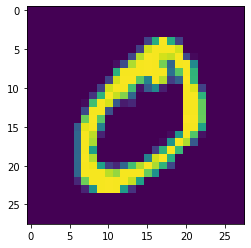

In [43]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.fromarray(img_data, 'RGB')

plt.imshow(img_data.reshape(28,28))

In [45]:
!./mnist_deepC/mnist.exe img.data

writing file deepSea_result_1.out.


In [47]:
nn_out = np.loadtxt('deepSea_result_1.out')
print ("Model prediction is DIGIT : ", np.argmax(nn_out))

Model prediction is DIGIT :  0
